In [66]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [133]:
# Interim output saved.
df1 = pd.read_csv('./data/201601-CBike-v2.csv')
df1.head()

,level_0,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,...,gender,StDate,StTime,EndDt,EndTime,Mnth,Yr,DayInd,WkDay,WkDayInd
0,0,0.0,923.0,1/1/2016 00:00:41,1/1/2016 00:16:04,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,...,1.0,2016-01-01,00:00:41,2016-01-01,00:16:04,1,2016,0,4,1
1,1,1.0,379.0,1/1/2016 00:00:45,1/1/2016 00:07:04,476.0,E 31 St & 3 Ave,40.743943,-73.979661,498.0,...,1.0,2016-01-01,00:00:45,2016-01-01,00:07:04,1,2016,0,4,1
2,2,2.0,589.0,1/1/2016 00:00:48,1/1/2016 00:10:37,489.0,10 Ave & W 28 St,40.750664,-74.001768,284.0,...,2.0,2016-01-01,00:00:48,2016-01-01,00:10:37,1,2016,0,4,1
3,3,3.0,889.0,1/1/2016 00:01:06,1/1/2016 00:15:56,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,...,2.0,2016-01-01,00:01:06,2016-01-01,00:15:56,1,2016,0,4,1
4,4,4.0,1480.0,1/1/2016 00:01:12,1/1/2016 00:25:52,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,2006.0,...,1.0,2016-01-01,00:01:12,2016-01-01,00:25:52,1,2016,0,4,1


In [2]:
# Raw Citibike data
df = pd.read_csv('./data/201601-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [113]:
df.shape

(509478, 15)

In [3]:
# df1 = df[0:1000].copy()
df1 = df.copy()

In [136]:
df1.head(3)

,level_0,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,...,gender,StDate,StTime,EndDt,EndTime,Mnth,Yr,DayInd,WkDay,WkDayInd
0,0,0.0,923.0,1/1/2016 00:00:41,1/1/2016 00:16:04,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,...,1.0,2016-01-01,00:00:41,2016-01-01,00:16:04,1,2016,0,4,1
1,1,1.0,379.0,1/1/2016 00:00:45,1/1/2016 00:07:04,476.0,E 31 St & 3 Ave,40.743943,-73.979661,498.0,...,1.0,2016-01-01,00:00:45,2016-01-01,00:07:04,1,2016,0,4,1
2,2,2.0,589.0,1/1/2016 00:00:48,1/1/2016 00:10:37,489.0,10 Ave & W 28 St,40.750664,-74.001768,284.0,...,2.0,2016-01-01,00:00:48,2016-01-01,00:10:37,1,2016,0,4,1


In [4]:
df1['StDate'] = ''
df1['StTime'] = ''
df1['EndDt'] = ''
df1['EndTime'] = ''
df1['Mnth'] = ''
df1['Yr'] = ''
df1['DayInd'] = ''
df1['WkDay'] = ''
df1['WkDayInd'] = ''
df1['dayInd'] = ''


In [101]:
# df1.rename(columns={'mnth': 'Mnth'}, inplace=True)

In [195]:
list(df1.columns)

['level_0',
 'index',
 'tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender',
 'StDate',
 'StTime',
 'EndDt',
 'EndTime',
 'Mnth',
 'Yr',
 'DayInd',
 'WkDay',
 'WkDayInd',
 'dayInd']

In [129]:
df1.starttime[0].split(' ')

['1/1/2016', '00:00:41']

In [27]:
# Data Wrangling -

df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)

# df1.shape[0]

for i in range(df1.shape[0]):
    st_spl = df1.starttime[i].split(' ')
    df1.set_value(i, 'StDate', st_spl[0])
    df1.set_value(i, 'StTime', st_spl[1])
    
    stop_spl = df1.stoptime[i].split(' ')
    df1.set_value(i, 'EndDt', stop_spl[0])
    df1.set_value(i, 'EndTime', stop_spl[1])

    # Day Indicator from Start time
    stt_list = df1.StTime[i].split(':')
    stt_list = [int(j) for j in stt_list]
    if (stt_list[0] in range(5,17)):
        # Day - Yes
        day_ind = 1
    else:
        # Night - Yes
        day_ind = 0
    df1.set_value(i, 'DayInd', int(day_ind))
    
df1.dropna(inplace=True)
df1.reset_index(drop=False, inplace=True)

In [29]:

df1['StDate'] = pd.to_datetime(df1['StDate'])
df1['EndDt'] = pd.to_datetime(df1['EndDt'])

df1['WkDay'] = df1['StDate'].dt.dayofweek
df1['Mnth'] = df1['StDate'].dt.month
df1['Yr'] = df1['StDate'].dt.year

# Weekday Indicator definition
wk_ind = {0:1,1:1,2:1,3:1,4:1, 5:0,6:0}
df1['WkDayInd'] = df1['WkDay'].apply(lambda x: wk_ind[x])

# df1 new file logic is till here ---------------------------


In [ ]:
df1['PickHr'] = ''
hlist = []

for x in range(len(df1.StTime)):
    y =list(df1.StTime.str.split(':'))[:][x][0]
    hlist.append(y)
    
df2['PickHr'] = hlist

In [36]:
df1.to_csv('201601-CBike-v2.csv', index=False)

In [ ]:
df2 = df1[0:1000].copy()
df2['PickHr1'] = ''
df2['PickHr1'] = df1.StTime.str.split(':').str.get[0]
df2.head(3)

In [ ]:
rows = random.sample(df1.index, 10)
df_10 = df.ix[rows]
df_90 = df.drop(rows)

In [ ]:
df_10.groupby('PickHr','start station id')[]

In [ ]:
# Sample Code - 

df1 = df[0:1000].copy()

df1[:1][['tripduration']]
# print df1.starttime[0].split(' ')[0]
df1[:1][['StDate']]
# Drop column
df1.drop('dayInd', axis=1, inplace=True)


df1[:3][:]
df1[df1['DayInd']>0].head(3)

# df1['WkDayInd'] = df1['starttime'].dt.dayofweek

# days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
# df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1['Mnth'] = df1['Mnth'].apply(lambda x: months[x])

df1['StTime'] = pd.to_datetime(df1['StTime'])

df1.dropna(inplace=True)
df1.reset_index(drop=False, inplace=True)

stt_list = df1.StTime[i].split(':')
stt_list = [int(i) for i in stt_list]

df1.set_value(i, 'DayInd', int(day_ind))

rows = random.sample(df1.index, 10)
df_10 = df.ix[rows]
df_90 = df.drop(rows)


In [82]:
# Rough work - 

# st_spl = df1.starttime[0].split(' ')

# # df1[0:1][['stdate']] = st_spl[0]
# df1.set_value(0, 'stdate', st_spl[0])
# stt_list = df1.sttime[0].split(':')

stt_list = '16:00:41'.split(':')
print stt_list

print stt_list

stt_list = [int(i) for i in stt_list]
if (stt_list[0] in range(5,17)):
        day_ind = 1
else:
        day_ind = 0
    

day_ind



['16', '00', '41']
[16, 0, 41]


1

In [65]:
for i in range(df3.shape[0]):
    stt_list = df3.StTime[0].split(':')
    stt_list = [int(i) for i in stt_list]
    stt_list

AttributeError: 'DataFrame' object has no attribute 'StTime'

In [23]:
# Plotting - 
pl.rcParams['figure.figsize'] = (10, 10)
df2 = df1[0:1000].copy()
df3 = df2[['WkDay','tripduration']]
df3.head(2)


Index([u'WkDay', u'tripduration'], dtype='object')

In [59]:
df2[df2['tripduration']>5000.0]

,level_0,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,...,gender,StDate,StTime,EndDt,EndTime,Mnth,Yr,DayInd,WkDay,WkDayInd
220,220,220.0,326222.0,1/1/2016 00:58:20,1/4/2016 19:35:23,391.0,Clark St & Henry St,40.697601,-73.993446,310.0,...,1.0,2016-01-01,00:58:20,2016-01-04,19:35:23,1,2016,0,4,1


In [56]:
df3.set_value(220, 'tripduration', 0)

,WkDay,tripduration
0,4,923.0
1,4,379.0
2,4,589.0
3,4,889.0
4,4,1480.0
5,4,332.0
6,4,2321.0
7,4,694.0
8,4,1376.0
9,4,615.0


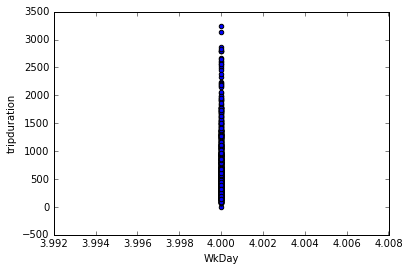

In [58]:
df3.plot.scatter('WkDay','tripduration')

In [ ]:
for i in range(df1.shape[0]):
    pl.plot(df1[i][['WkDay']], df1[i][['tripduration']])
    
ax = df2[['WkDay','tripduration']].plot(kind='bar', title ="WkDay vs Tripduration", 
                                        figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Week Day", fontsize=12)
ax.set_ylabel("Trip Duration", fontsize=12)
plt.show()

fig = pl.figure(figsize = (13,13))
ax1 = fig.add_subplot(122)
for i in range(df2.shape[0]):
    ax1.hist(df2.WkDay[i], bins=np.arange(0,7,1), alpha=0.5)

list(df2.StTime.str.split(':'))[:][7][0]